In [1]:
from astropy.table import Table
from astropy.table import Column
from astropy.io import fits
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

# Import gz2 data as a table
gz2_data = Table.read("gz2_hart16.fits")
list(gz2_data.columns)

['dr7objid',
 'ra',
 'dec',
 'rastring',
 'decstring',
 'sample',
 'gz2_class',
 'total_classifications',
 'total_votes',
 't01_smooth_or_features_a01_smooth_count',
 't01_smooth_or_features_a01_smooth_weight',
 't01_smooth_or_features_a01_smooth_fraction',
 't01_smooth_or_features_a01_smooth_weighted_fraction',
 't01_smooth_or_features_a01_smooth_debiased',
 't01_smooth_or_features_a01_smooth_flag',
 't01_smooth_or_features_a02_features_or_disk_count',
 't01_smooth_or_features_a02_features_or_disk_weight',
 't01_smooth_or_features_a02_features_or_disk_fraction',
 't01_smooth_or_features_a02_features_or_disk_weighted_fraction',
 't01_smooth_or_features_a02_features_or_disk_debiased',
 't01_smooth_or_features_a02_features_or_disk_flag',
 't01_smooth_or_features_a03_star_or_artifact_count',
 't01_smooth_or_features_a03_star_or_artifact_weight',
 't01_smooth_or_features_a03_star_or_artifact_fraction',
 't01_smooth_or_features_a03_star_or_artifact_weighted_fraction',
 't01_smooth_or_featur

In [2]:
# Filter out debiased merger fraction only
merger_debiased = Table([gz2_data["t08_odd_feature_a24_merger_debiased"]])
merger_debiased["t08_odd_feature_a24_merger_debiased"].name = "Merger Fraction Debiased"
merger_debiased.columns

<TableColumns names=('Merger Fraction Debiased')>

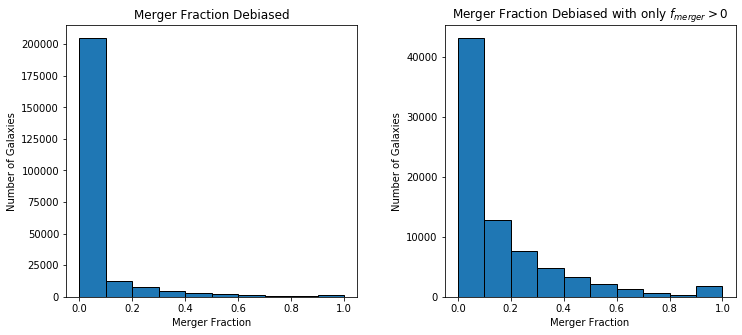

In [3]:
fig, ax = plt.subplots(1, 2, figsize=(12,5))

# Plot histogram of entire gz2 data merger fraction
ax[0].hist(merger_debiased["Merger Fraction Debiased"],  bins=10, range=(0,1), edgecolor="black")
ax[0].set_xlabel("Merger Fraction")
ax[0].set_ylabel("Number of Galaxies")
ax[0].set_title("Merger Fraction Debiased")

# Plot historgram of gz2 data with non zero merger fraction
merger_debiased_nonzero = merger_debiased[merger_debiased["Merger Fraction Debiased"] > 0]
ax[1].hist(merger_debiased_nonzero["Merger Fraction Debiased"], bins=10, range=(0,1), edgecolor="black")
ax[1].set_xlabel("Merger Fraction")
ax[1].set_ylabel("Number of Galaxies")
ax[1].set_title("Merger Fraction Debiased with only $f_{merger} > 0$")
fig.subplots_adjust(wspace=0.3)

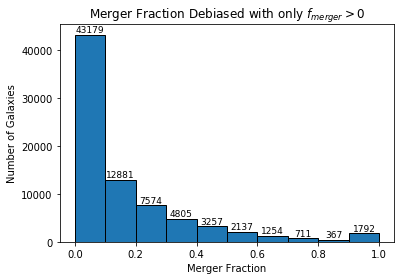

In [4]:
merger_debiased_nonzero = merger_debiased[merger_debiased["Merger Fraction Debiased"] > 0]
num_of_bins = 10
data = merger_debiased_nonzero["Merger Fraction Debiased"]
fig = plt.hist(data, bins=num_of_bins, range=(0,1), edgecolor="black")
plt.xlabel("Merger Fraction")
plt.ylabel("Number of Galaxies")
plt.title("Merger Fraction Debiased with only $f_{merger} > 0$")
for i in range(num_of_bins):
    plt.text((fig[1][i] + fig[1][i+1]) / 2,fig[0][i]+500,str(int(fig[0][i])), fontsize=9, ha='center')
plt.show()

In [5]:
tb = fits.open(r"C:\Users\mincy\OneDrive\University\Physics\4th Year Michaelmas\Project\gz2_hart16.fits")
tb.info()

Filename: C:\Users\mincy\OneDrive\University\Physics\4th Year Michaelmas\Project\gz2_hart16.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU       4   ()      
  1                1 BinTableHDU    547   239695R x 231C   [K, E, E, 44A, 44A, 80A, 8A, I, I, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K, I, E, E, E, D, K]   
